In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!ls "/Users/adityaverma/Downloads/Leaf_detection"



Leaf_detection.ipynb healthy              spot


In [4]:
pip install tensorflow==2.12 pandas numpy matplotlib opencv-python pillow scikit-learn


ERROR: Could not find a version that satisfies the requirement tensorflow==2.12 (from versions: 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.12
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
from os import listdir
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.utils import img_to_array,array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.utils import to_categorical


In [5]:

print(tf.__version__)

2.16.1


<function matplotlib.pyplot.show(close=None, block=None)>

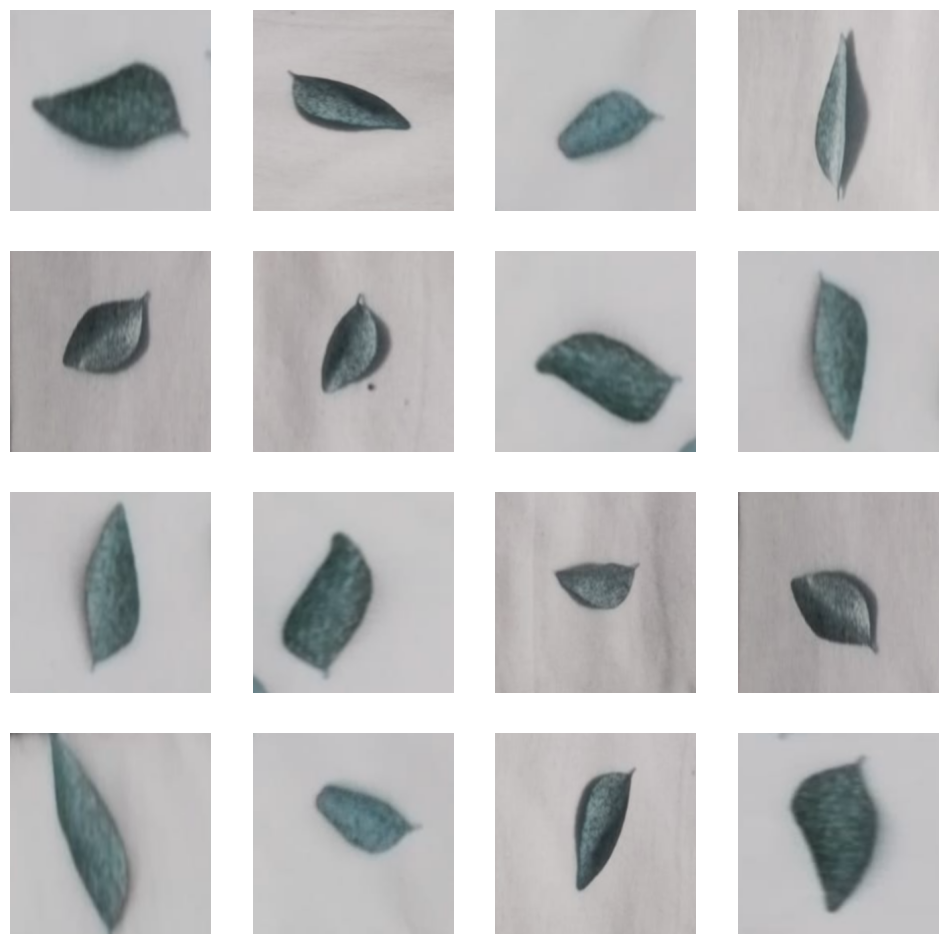

In [7]:
plt.figure(figsize=(12,12))
path =  "/Users/adityaverma/Downloads/Leaf_detection/spot"
for i in range (1,17):
  plt.subplot(4,4,i)
  plt.tight_layout
  img = cv2.imread(os.path.join(path,os.listdir(path)[i]))
  plt.imshow(img)
  plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

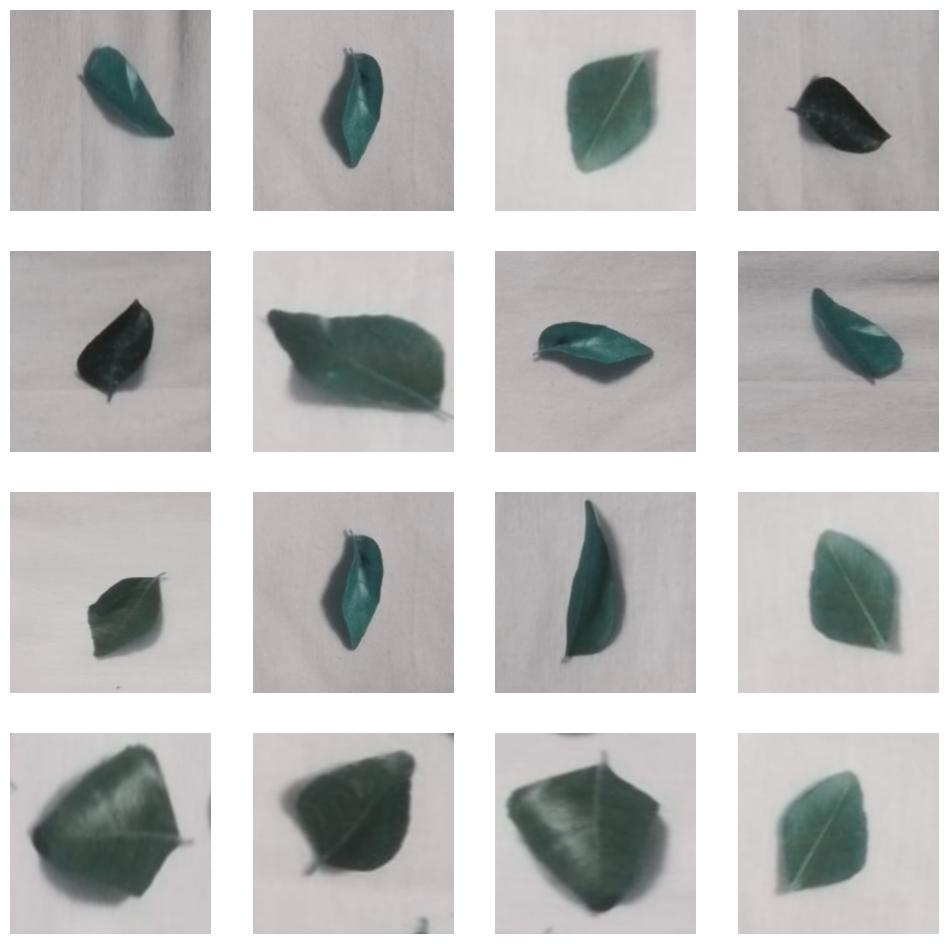

In [8]:
plt.figure(figsize=(12,12))
path =  "/Users/adityaverma/Downloads/Leaf_detection/healthy"
for i in range (1,17):
  plt.subplot(4,4,i)
  plt.tight_layout
  img = cv2.imread(os.path.join(path,os.listdir(path)[i]))
  plt.imshow(img)
  plt.axis('off')
plt.show

In [9]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256,256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [10]:
dir = "/Users/adityaverma/Downloads/Leaf_detection"
image_list , label_list = [],[]
all_labels = ['spotted','healthy']
binary_labels = [0,1]
temp = -1


for directory in ['spot','healthy']:
  plant_image_list = listdir(f"{dir}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dir}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [11]:
label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    231
1    180
Name: count, dtype: int64

In [12]:
image_list[0].shape


(256, 256, 3)

In [13]:
x_train, x_test , y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state=10)

In [14]:
x_train = np.array(x_train, dtype=np.float16) / 255.0
x_test = np.array(x_test, dtype=np.float16) / 255.0
x_train = x_train.reshape(-1,256,256,3)
x_test = x_test.reshape(-1,256,256,3)

In [15]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3),padding="same", input_shape=(256,256,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16,(3,3),padding ="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(8, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,338 (903.66 KB)

 Trainable params: 231,338 (903.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [18]:
x_train, x_val,y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=10)

In [19]:
epochs = 50
batch_size = 32
history = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs,
                    validation_data=(x_val, y_val))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 325ms/step - accuracy: 0.5023 - loss: 1.4192 - val_accuracy: 0.5303 - val_loss: 0.6931
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step - accuracy: 0.4230 - loss: 0.6934 - val_accuracy: 0.4697 - val_loss: 0.6932
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 285ms/step - accuracy: 0.5320 - loss: 0.6978 - val_accuracy: 0.4697 - val_loss: 0.6934
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.5782 - loss: 0.6925 - val_accuracy: 0.4697 - val_loss: 0.6936
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.5991 - loss: 0.6918 - val_accuracy: 0.4697 - val_loss: 0.6938
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 262ms/step - accuracy: 0.6210 - loss: 0.6905 - val_accuracy: 0.4697 - val_loss: 0.6942
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 300ms/step - accuracy: 0.5576 - loss: 0.6914 - val_accuracy: 0.4697 - val_loss: 0.6945
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 253ms/step - accuracy: 0.5730 - loss: 0.6904 - val_accuracy: 0.4697 - val_loss:

In [27]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100:.2f}%")

Calculating model accuracy
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5839 - loss: 0.6793
Test Accuracy: 56.63%


In [26]:
y_pred = model.predict(x_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


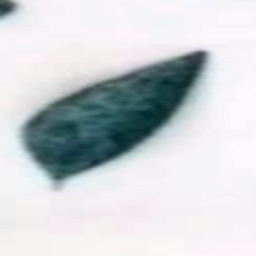

In [22]:
img = array_to_img(x_test[11])
img

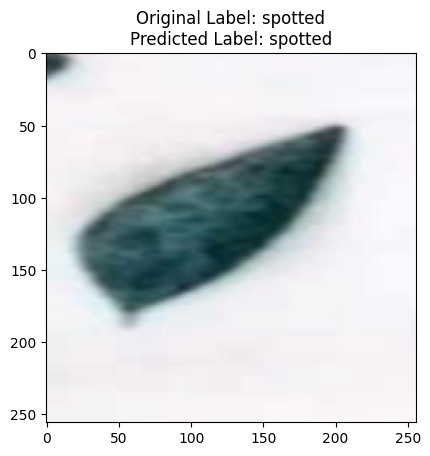

In [25]:
img = array_to_img(x_test[11])
plt.imshow(img)
plt.title(f"Original Label: {all_labels[np.argmax(y_test[11])]}\nPredicted Label: {all_labels[np.argmax(y_pred[11])]}")
plt.show()

In [24]:
for i in range(50):
    print(f"Predicted: {all_labels[np.argmax(y_pred[i])]} - Original: {all_labels[np.argmax(y_test[i])]}")


spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - healthy
spotted - healthy
spotted - healthy
spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - spotted
spotted - spotted
spotted - healthy
spotted - healthy
spotted - spotted
spotted - spotted
spotted - spotted
spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - healthy
spotted - spotted
spotted - healthy
spotted - healthy
spotted - spotted
spotted - healthy
spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - spotted
spotted - healthy
spotted - healthy
spotted - healthy
spotted - spotted
spotted - spotted
spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - healthy
spotted - spotted
spotted - spotted
spotted - healthy
